In [60]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import math
import matplotlib.pyplot as plt

In [61]:
# Load the time series dataset
data = pd.read_csv('../datasets/complete_data/df.csv')

# Change column names to match prophet naming convention
data = data.rename(columns={'start MTU (UTC)': 'ds', 'Day-ahead Price [EUR/MWh] BZN|NO1': 'y'})

# Split the dataset into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Create the feature and target arrays
X_train, y_train = train_data.drop(columns=['ds', 'y']), train_data['y']
X_test, y_test = test_data.drop(columns=['ds', 'y']), test_data['y']

X_train.head()

,Day-ahead Price [EUR/MWh] BZN|NO3,Day-ahead Price [EUR/MWh] BZN|NO5,Day-ahead Price [EUR/MWh] BZN|SE3,Actual Total Load [MW] - BZN|NO5,Actual Total Load [MW] - BZN|SE3,Hydro Run-of-river and poundage - BZN|NO1,Hydro Water Reservoir - BZN|NO1,Wind Onshore - BZN|NO1,Hydro Pumped Storage Aggregated- BZN|NO2,Hydro Run-of-river and poundage - BZN|NO2,...,CBF BZN|NO2 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO2 [MW],CBF BZN|NO3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO3 [MW],CBF BZN|NO5 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO5 [MW],CBF BZN|SE3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|SE3 [MW],Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO5,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|SE3
0,41.33,129.30,41.33,1991.000000,10746.692308,878.0,321.0,172.0,1.0,629.0,...,1242.0,0.0,371.0,0.0,594.0,0.0,1065.0,0.0,8631916.0,1656000.0
1,42.18,132.08,42.18,1992.666667,10716.307692,897.0,330.0,151.0,1.0,627.0,...,1222.0,0.0,383.0,0.0,676.0,0.0,927.0,0.0,8631916.0,1656000.0
2,44.37,111.44,44.37,1994.333333,10685.923077,885.0,275.0,160.0,1.0,624.0,...,1679.0,0.0,362.0,0.0,436.0,0.0,748.0,0.0,8631916.0,1656000.0
3,37.67,112.35,37.67,1996.000000,10655.538462,890.0,269.0,148.0,1.0,624.0,...,1668.0,0.0,324.0,0.0,345.0,0.0,918.0,0.0,8631916.0,1656000.0
4,39.70,113.90,39.70,1985.500000,10625.153846,892.0,300.0,147.0,1.0,605.0,...,1697.0,0.0,339.0,0.0,412.0,0.0,826.0,0.0,8631916.0,1656000.0


In [62]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training set
model.fit(X_train, y_train)

LinearRegression()

In [63]:
# Make a prediction on the testing set
predicted_values = model.predict(X_test)

# Calculate the mean absolute error (MAE) between the predicted and actual values
mae = mean_absolute_error(y_test, predicted_values)
print("Mean absolute error:            ", mae)

# Calculate the mean absolute percentage error (MAE) between the predicted and actual values
mape = mean_absolute_percentage_error(y_test, predicted_values)
print("Mean absolute percentage error: ", mape)

# Calculating the mean squared error (MSE) between the predicted and actual values
mse = mean_squared_error(y_test, predicted_values)
print("Mean squared error:             ", mse)

# Calculating the root mean squared error (RMSE) between the predicted and actual values
rmse = math.sqrt(mse)
print("Rood mean squared error:        ", rmse)


Mean absolute error:             2.845691690189789
Mean absolute percentage error:  0.32691738088790073
Mean squared error:              19.142433754323893
Rood mean squared error:         4.3752067098965615


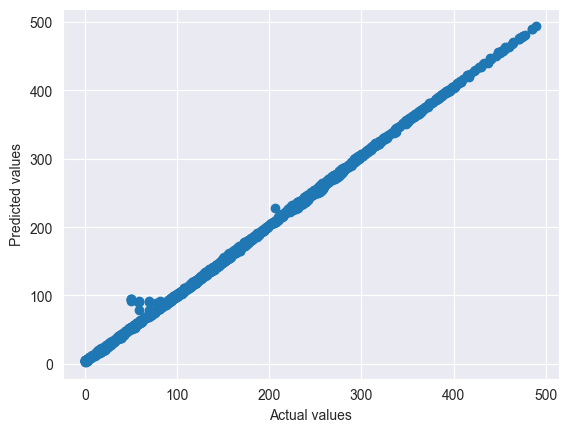

In [64]:
# Plot the predicted values against the actual values
plt.plot(y_test, predicted_values, 'o')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()